In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [12]:
df= pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [14]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [15]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [16]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(96146, 9)

In [20]:
df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17877   415]
 [  451  1257]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18292
           1       0.75      0.74      0.74      1708

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import joblib

df= pd.read_csv('diabetes_prediction_dataset.csv')

df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable

one_hot_columns = X.columns
joblib.dump(one_hot_columns, 'one_hot_columns.pkl')

y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the resampled dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(rf, 'diabetes_model.joblib')

[[18103   189]
 [  487  1221]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.87      0.71      0.78      1708

    accuracy                           0.97     20000
   macro avg       0.92      0.85      0.88     20000
weighted avg       0.96      0.97      0.96     20000



['diabetes_model.joblib']

In [23]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [24]:
df.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [25]:
df.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Female                    uint8
gender_Male                      uint8
gender_Other                     uint8
smoking_history_No Info          uint8
smoking_history_current          uint8
smoking_history_ever             uint8
smoking_history_former           uint8
smoking_history_never            uint8
smoking_history_not current      uint8
dtype: object

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

# Assuming the dataframe is already loaded in 'df'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model on the resampled dataset
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16229  2063]
 [  269  1439]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     18292
           1       0.41      0.84      0.55      1708

    accuracy                           0.88     20000
   macro avg       0.70      0.86      0.74     20000
weighted avg       0.93      0.88      0.90     20000



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Logistic Regression model on the resampled dataset
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17562   730]
 [  464  1244]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18292
           1       0.63      0.73      0.68      1708

    accuracy                           0.94     20000
   macro avg       0.80      0.84      0.82     20000
weighted avg       0.94      0.94      0.94     20000



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes_prediction_dataset.csv')

df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train an XGBoost model on the resampled dataset
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18218    74]
 [  508  1200]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes_prediction_dataset.csv')
df = df.drop_duplicates()
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train an XGBoost model on the resampled dataset
xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17447    62]
 [  522  1199]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.70      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes_prediction_dataset.csv')

df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[18240    52]
 [  520  1188]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[18228    64]
 [  520  1188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Instance 1:
Predicted Class: 0
Probability of Class 0: 0.9883
Probability of Class 1: 0.0117

Ins

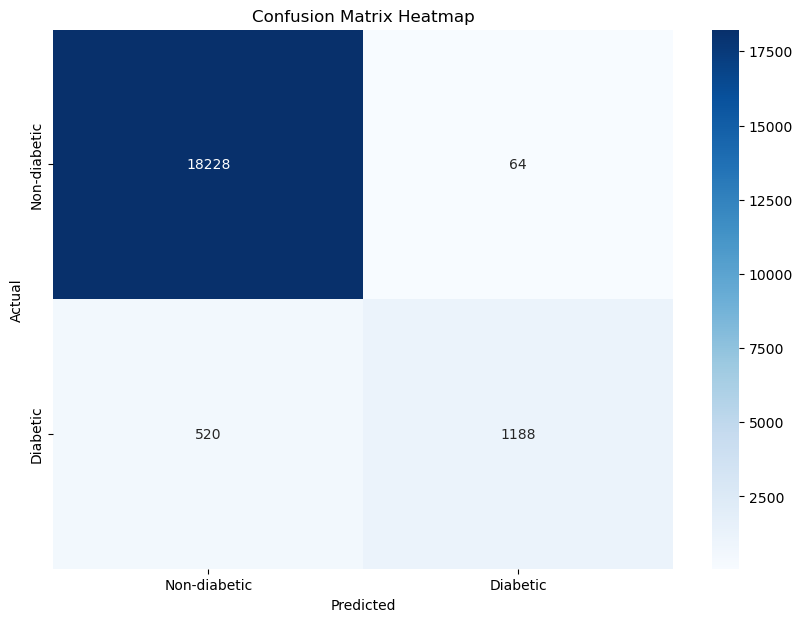

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
# df = df.drop_duplicates()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Separate features and target
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Save the column names for future use
one_hot_columns = X.columns
joblib.dump(one_hot_columns, 'one_hot_columns.pkl')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Save the trained model
joblib.dump(lgb_clf, 'diabetes_model.joblib')

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Get predicted probabilities
y_pred_proba = lgb_clf.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show some predicted probabilities for the first 5 test instances
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"Predicted Class: {y_pred[i]}")
    print(f"Probability of Class 0: {y_pred_proba[i][0]:.4f}")
    print(f"Probability of Class 1: {y_pred_proba[i][1]:.4f}")
    print()

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [22]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98     18292\n           1       0.95      0.70      0.80      1708\n\n    accuracy                           0.97     20000\n   macro avg       0.96      0.85      0.89     20000\nweighted avg       0.97      0.97      0.97     20000\n'

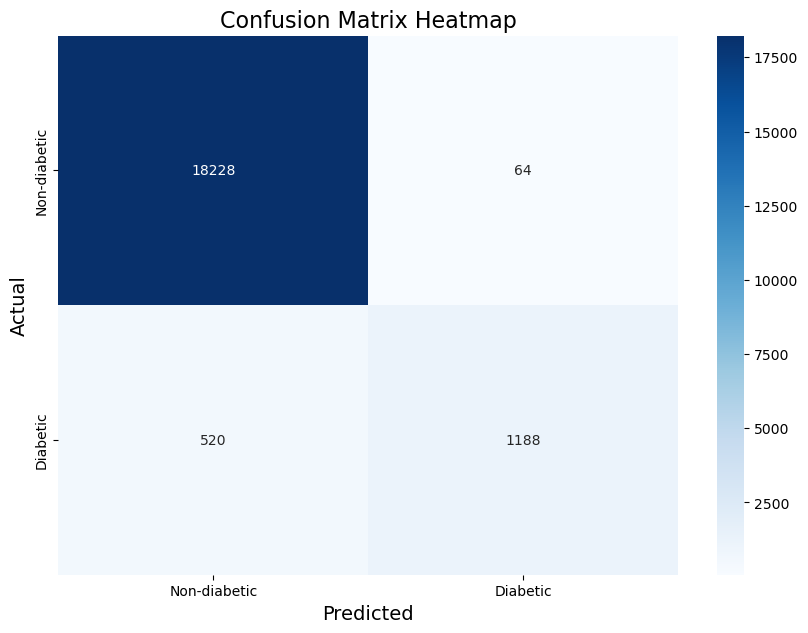

In [23]:
# increasee font size
plt.size
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.show()

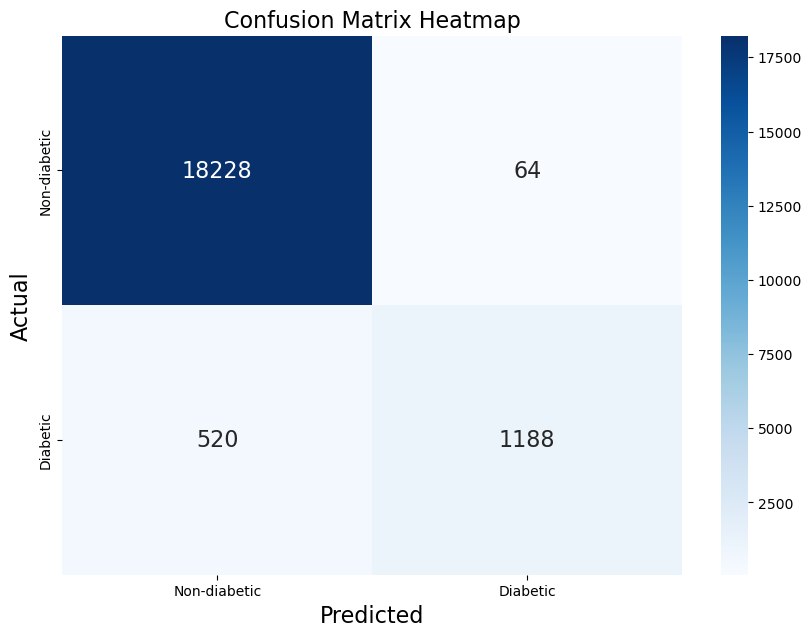

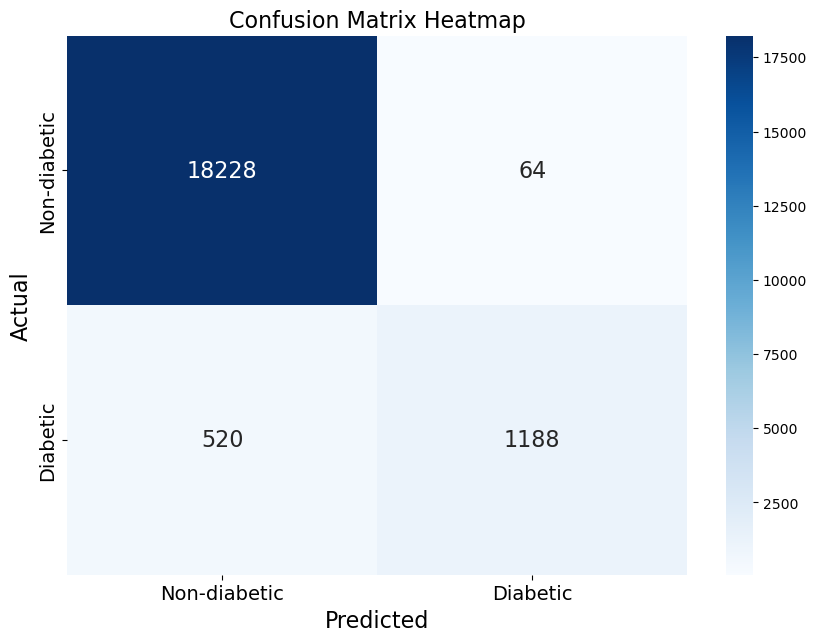

In [26]:
# increase font size of confusion metrics value
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'], annot_kws={'size': 16})
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.show()

# increase ytikc and xtick font size
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-diabetic', 'Diabetic'], yticklabels=['Non-diabetic', 'Diabetic'], annot_kws={'size': 16})
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
# df = df.drop_duplicates()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Separate features and target
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Save the column names for future use
one_hot_columns = X.columns
joblib.dump(one_hot_columns, 'one_hot_columns.pkl')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, 'scaler.pkl')

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Save the trained model
joblib.dump(lgb_clf, 'diabetes_model.joblib')

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Get predicted probabilities
y_pred_proba = lgb_clf.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show some predicted probabilities for the first 5 test instances
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"Predicted Class: {y_pred[i]}")
    print(f"Probability of Class 0: {y_pred_proba[i][0]:.4f}")
    print(f"Probability of Class 1: {y_pred_proba[i][1]:.4f}")
    print()


[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[18228    64]
 [  520  1188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.70      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Instance 1:
Predicted Class: 0
Probability of Class 0: 0.9883
Probability of Class 1: 0.0117

Instance 2:
Predicted Class: 0
Probability of Class 0: 1.0000
Proba

In [15]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
import pandas as pd
import joblib

# Load the model, scaler, and column orders
model = joblib.load('diabetes_model.joblib')
scaler = joblib.load('scaler.pkl')
one_hot_columns = joblib.load('one_hot_columns.pkl')

# Example new data (ensure it matches the training data structure)
new_data = pd.DataFrame([{
    'gender': 'Female',
    'age': 25,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'never',
    'bmi': 28,
    'HbA1c_level': 5.8,
    'blood_glucose_level': 188
}])

# One-hot encode new data
new_data_encoded = pd.get_dummies(new_data, columns=['gender', 'smoking_history'])
new_data_encoded = new_data_encoded.reindex(columns=one_hot_columns, fill_value=0)
print(new_data_encoded)
# Scale new data
new_data_scaled = scaler.transform(new_data_encoded)

# Make predictions
prediction = model.predict(new_data_scaled)[0]
probability = model.predict_proba(new_data_scaled)[0][1]

print(f"Predicted Class: {prediction}")
print(f"Probability of Class 1: {probability:.4f}")

   age  hypertension  heart_disease  bmi  HbA1c_level  blood_glucose_level  \
0   25             0              0   28          5.8                  188   

   gender_Female  gender_Male  gender_Other  smoking_history_No Info  \
0              1            0             0                        0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                        0                     0                       0   

   smoking_history_never  smoking_history_not current  
0                      1                            0  
Predicted Class: 0
Probability of Class 1: 0.0126


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
# df = df.drop_duplicates()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Separate features and target
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Get predicted probabilities
y_pred_proba = lgb_clf.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show some predicted probabilities for the first 5 test instances
for i in range(5):
    print(f"Instance {i+1}:")
    print(f"Predicted Class: {y_pred[i]}")
    print(f"Probability of Class 0: {y_pred_proba[i][0]:.4f}")
    print(f"Probability of Class 1: {y_pred_proba[i][1]:.4f}")
    print()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[18240    52]
 [  520  1188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Instance 1:
Predi

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes_prediction_dataset.csv')
df = df.drop_duplicates()
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 70155, number of negative: 70155
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 140310, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[17479    30]
 [  532  1189]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.98      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.97      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes_prediction_dataset.csv')

# df = pd.get_dummies(df, columns=['gender', 'smoking_history'])
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a LightGBM model on the resampled dataset
lgb_clf = LGBMClassifier(objective='binary', random_state=42)
lgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgb_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 73208, number of negative: 73208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 146416, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[18156   136]
 [  488  1220]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.71      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv('diabetes_prediction_dataset.csv')

# Identify categorical columns
categorical_features = ['gender', 'smoking_history']

# Split the dataset into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a CatBoost model on the resampled dataset
cat_model = CatBoostClassifier(cat_features=categorical_features)
cat_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = cat_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Male'

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

# Assuming the dataframe is already loaded in 'df'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a k-NN model on the resampled dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16460  1832]
 [  384  1324]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     18292
           1       0.42      0.78      0.54      1708

    accuracy                           0.89     20000
   macro avg       0.70      0.84      0.74     20000
weighted avg       0.93      0.89      0.90     20000



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Assuming the dataframe is already loaded in 'df'
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a k-NN model on the resampled dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16517  1775]
 [  369  1339]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     18292
           1       0.43      0.78      0.56      1708

    accuracy                           0.89     20000
   macro avg       0.70      0.84      0.75     20000
weighted avg       0.93      0.89      0.91     20000



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Use get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

# Define features and target variable
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Decision Tree classifier on the resampled dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17737   555]
 [  434  1274]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.70      0.75      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('diabetes_prediction_dataset.csv')

# Assuming the dataframe is already loaded in 'df'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Define features and target variable
X = df.drop('diabetes', axis=1)  # assuming 'diabetes' is the target variable
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Decision Tree classifier on the resampled dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17692   600]
 [  437  1271]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.68      0.74      0.71      1708

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from imblearn.over_sampling import SMOTE
import joblib

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Define features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('diabetes_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


Epoch 1/5
8000/8000 [==============================] - 83s 10ms/step - loss: 0.1102 - accuracy: 0.9624
Epoch 2/5
8000/8000 [==============================] - 108s 14ms/step - loss: 0.0883 - accuracy: 0.9694
Epoch 3/5
8000/8000 [==============================] - 122s 15ms/step - loss: 0.0853 - accuracy: 0.9706
Epoch 4/5
8000/8000 [==============================] - 75s 9ms/step - loss: 0.0844 - accuracy: 0.9707
Epoch 5/5
625/625 [==============================] - 11s 12ms/step
Accuracy: 97.05%


['scaler.pkl']

In [33]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18238    54]
 [  537  1171]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

df= pd.read_csv('diabetes_prediction_dataset.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Define features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create a deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_resampled, epochs=5, batch_size=10, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# # Save the model
# model.save('diabetes_model.h5')

# # Save the scaler
# joblib.dump(scaler, 'scaler.pkl')

Epoch 1/5
14642/14642 [==============================] - 101s 7ms/step - loss: 0.2063 - accuracy: 0.9015
Epoch 2/5
14642/14642 [==============================] - 94s 6ms/step - loss: 0.1784 - accuracy: 0.9126
Epoch 3/5
14642/14642 [==============================] - 94s 6ms/step - loss: 0.1751 - accuracy: 0.9145
Epoch 4/5
14642/14642 [==============================] - 92s 6ms/step - loss: 0.1730 - accuracy: 0.9150
Epoch 5/5
625/625 [==============================] - 2s 3ms/step
Accuracy: 91.14%
[[16739  1553]
 [  219  1489]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18292
           1       0.49      0.87      0.63      1708

    accuracy                           0.91     20000
   macro avg       0.74      0.89      0.79     20000
weighted avg       0.94      0.91      0.92     20000

